In [52]:
def plot_decision_regions(X,y,classifer,test_idx=None,resolution=0.02):
    
    #setup marker generator and color map
    markers=('s','x','o','^','v')
    colors=('red','blue','lightgreen','gray','cyan')
    cmap=ListedColormap(colors[:len(np.unique(y))])
    
    #plot the decision surface
    x1_min,x1_max=X[:,0].min()-1,X[:,0].max()+1
    x2_min,x2_max=X[:,1].min(-1),X[:,1].max()+1
    xx1,xx2=np.meshgrid(np.arange(x1_min,x1_max,resolution),
                       np.arange(x2_min,x2_max,resolution))
    z=classifer.predict(np.array([xx1.ravel(),xx2.ravel()]).T)
    z=z.reshape(xx1.shape)
    plt.contourf(xx1,xx2,z,alpha=0.3,cmap=cmap)
    plt.xlim(xx1.min(),xx1.max())
    plt.ylim(xx2.min(),xx2.max())
    
    for idx,cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y== cl,0],
                    y=X[y== cl,1],
                   alpha=0.8,
                   c=colors[idx],
                   marker=markers[idx],
                   label=cl,
                   edgecolor='black')
    #highlight test samples
    if test_idx:
        #plot all samples
        X_test,y_test=X[test_idx,:],y[test_idx]
        plt.scatter(X_test[:,0],
                    X_test[:,1],
                    c='',
                    edgecolor='blasck',
                    alpha=1.0,
                    linewidth=1,
                    marker='o',
                    s=100,
                    label='test set')


In [53]:
import pandas as pd
import numpy as np
import  matplotlib.pyplot as plt
from sklearn.datasets import load_iris
import seaborn as sns
from matplotlib.colors import ListedColormap, LinearSegmentedColormap
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [68]:
iris=load_iris()

In [143]:
feature=pd.DataFrame(iris['data'][:,0],columns=['sepal length (cm)'])
feature1=pd.DataFrame(iris['data'][:,1],columns=['sepal width (cm)'])
data=pd.concat([feature,feature1],axis=1)
target=pd.DataFrame(iris['target'],columns=['class'])
data=pd.concat([data,target],axis=1)

In [144]:
X=data.iloc[:,:-1].values
y=data.iloc[:,-1].values

In [145]:
sc = StandardScaler()
sc=ss.fit(X)
X_std=sc.transform(X)

In [146]:
X_train_std,X_test_std,y_train,y_test=train_test_split(X_std,y,test_size=0.33,random_state=1)

In [147]:
from sklearn.naive_bayes import GaussianNB
gnb=GaussianNB()
gnb.fit(X_train_std,y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [148]:
gnb_predict=gnb.predict(X_test_std)

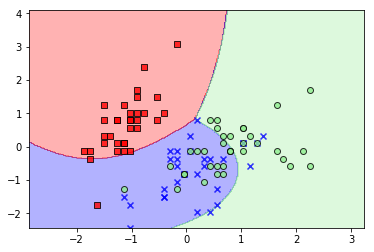

In [128]:
plot_decision_regions(X_train_std,y_train,gnb)

In [140]:
from sklearn.naive_bayes import GaussianNB
gnb=GaussianNB()
gnb_train=gnb.fit(X_test_std,y_test)

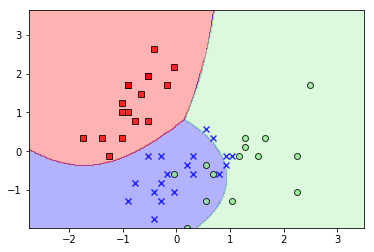

In [131]:
plot_decision_regions(X_test_std,y_test,gnb)

In [150]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,gnb_predict)

0.78